# Ford_go_bike
## by Ahmed_Adel_Hekal


>* Ford Gobike dataset is dataset for Ford bike sharing project  . 
>* This data contains 16 feature that record every thing   
> from location ,station id ,station name ,longitude and latitude 
> to end station ,end_station_id ,end_station_name ..etc .

In [68]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [69]:
df = pd.read_csv('data.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Our data is  183412 entries with 16 feature . we notice that we have missing data 

In [70]:
df.info() ## as we see there is missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

>* Data contains 183412  entries & 16 feature 

In [71]:
df.dropna(inplace = True)

## Now i am going to convert birth yeay to age 

In [72]:

old = (2020 - df['member_birth_year'])
df['age'] = (old).astype(int)

## Remove dot in time

In [73]:
def parseTotime(data):
    '''
    I will use .apply()  so i will deal with dataframe as one data per time
    that is what .apply() do  . 
    data presents one information passed to our function .
    
    temp is temporary variable that use to save data while procees it 
    we return our data to be saved after removing meaningless dot in it which cause problems when convert 
    data to datetime object 
    '''
    import datetime as dt 
    
    temp = data.split('.')
    return temp[0]

In [74]:
df['end_time'] = df['end_time'].apply(parseTotime )
df['start_time'] = df['start_time'].apply(parseTotime )


### Dropping unusefuel variables 

In [75]:
df.drop(labels=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','member_birth_year'],axis =1,inplace =True)

### After cleaning my new  dataset is :.

> My dataset is 183412 entries ,16 columns .after clean it up the new dataset is  174952 entries ,12 columns

### my main features  of interest are :.
>* member_gender ,user_type ,member_birth_year ,start_station_name ,end_station_name


###  Questions I am try to answer :.
>* who is more likely to use the service (customer or subscriber)  ? 
>* Which gender is more likely to ride a bike ? 
>* which station is more frequent to start the trip from and which is for end of the trip  ?
>* Is there is a relation between age & gender ?

###  Features in the dataset that will be used to support me :.

>* member_gender ,user_type ,member_birth_year ,start_station_name ,end_station_name

In [76]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'age'],
      dtype='object')

In [77]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,52185,32:10,01:56,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,36
2,61854,13:13,24:08,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,48
3,36490,54:26,02:36,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,31
4,1585,54:18,20:44,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,46
5,1793,49:58,19:51,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,61


### Now i will divide my dataset to customers &  subscribers datasets to study each seperately 

In [78]:
df_customer = df[df['user_type']== 'Customer']
df_sub      = df[df['user_type']== 'Subscriber']

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### plot customer dataset based on gender 

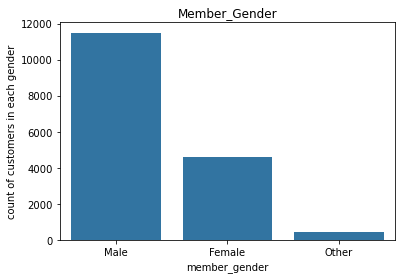

In [79]:
plt.title('Member_Gender')
sb.countplot(data=df_customer ,x='member_gender' ,color = sb.color_palette()[0]);
plt.ylabel('count of customers in each gender');

# we  see most of our users are males

### Before ploting age variable try to detect outliers and remove it 

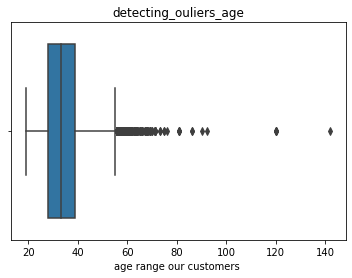

In [80]:
plt.title('detecting_ouliers_age')
sb.boxplot(data=df_customer ,x='age')
plt.xlabel('age range our customers ');

In [81]:
df_customer = df_customer [df_customer['age']<50]


## Age range from 20 to 50 year with most of our data is between 27 & 37

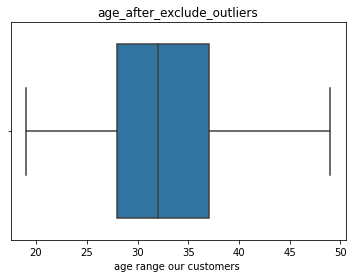

In [82]:
plt.title('age_after_exclude_outliers')
sb.boxplot(data=df_customer ,x='age')
plt.xlabel('age range our customers ');
# plt.ylabel

In [83]:
orders = df_customer['age'].value_counts().index

## Now we plot age to see most frequent age 

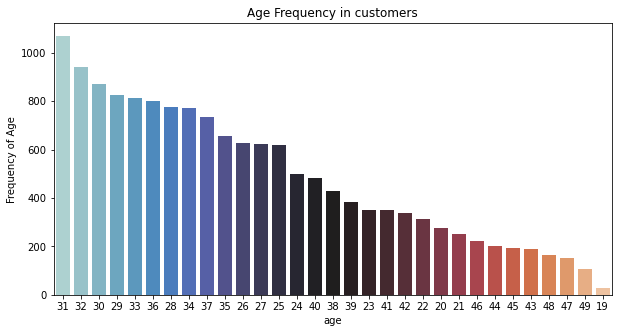

In [84]:
plt.figure(figsize=(10,5))
sb.countplot(data=df_customer ,x='age' ,color = sb.color_palette()[0] ,order=orders, palette='icefire');
plt.title('Age Frequency in customers')
plt.ylabel('Frequency of Age');
# plt.xlim((df_customer['age'].min(),df_customer['age'].max()))

## Most of customer are between  27~ 32

In [85]:
# df_customer = df_customer[df_customer.groupby('age').age.transform(len) > 1]
# df_customer.head()

## Dealing with duration var convert it from seconds to minutes

In [86]:
### convert from seconds to minutes
df_customer['duration'] = ((df_customer['duration_sec'])/60).astype(int)

In [87]:
##remove any data that only appears 5 times or less 
# df_customer = df_customer[df_customer.groupby('duration').duration.transform(len) > 5]


In [88]:
### See if there any noise 

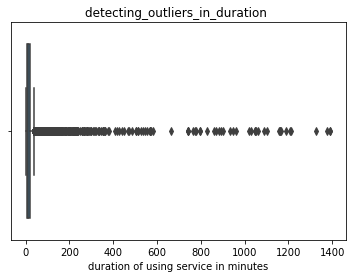

In [89]:
sb.boxplot(data = df_customer , x = 'duration') ### we got alot of noise 
plt.title('detecting_outliers_in_duration ')
plt.xlabel('duration of using service in minutes');

## Plotting our service usage duration which mostly range between 7 &18 minute

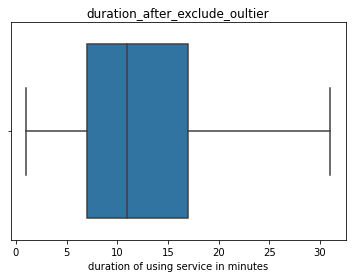

In [90]:
###remove any data more than 31 minute 
plt.title('duration_after_exclude_oultier')

df_customer = df_customer [df_customer['duration']<=31]
sb.boxplot(data = df_customer , x = 'duration');
plt.xlabel('duration of using service in minutes');

In [91]:
ticks = np.arange(df_customer['duration'].min(),df_customer['duration'].max()+5,5)
ticks_name = [str(x)  for x in range(df_customer['duration'].min(),df_customer['duration'].max()+5,5)]
orders = df_customer['duration'].value_counts().index

### frequency of  service duration  

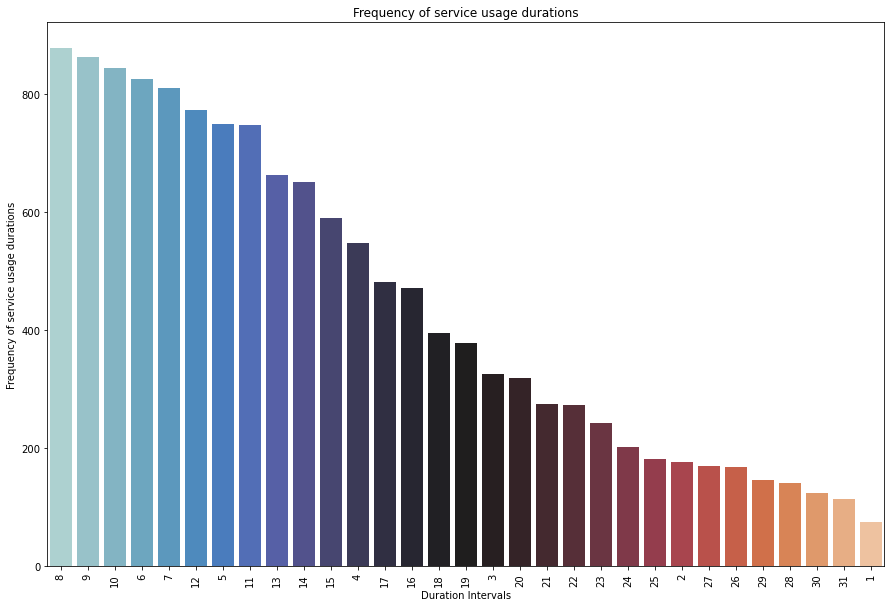

In [92]:
plt.figure(figsize=(15,10))
sb.countplot(data = df_customer , x ='duration' , order=orders ,palette='icefire') 
plt.xticks(rotation = 90)
plt.xlabel('Duration Intervals')
plt.ylabel('Frequency of service usage durations')
plt.title('Frequency of service usage durations');

## Which range between 7 & 18 minutes 

## First conclution part for customer
>* First time i plotted age i found alot of unresonable data as some user
>age was 124 year old so no chance for this to be true so i used boxplot 
> to know outliers so i will drop any data with older than 55 using boxplot i 
> found any thing above this value is outlier 
>* I dropped any duration more than 32 minute as it is outlier
>* Most customers use service between 7~18 minutes
>* Most Customers are male 
>* Most of customer have age between 27~ 32

## Time for subscribers

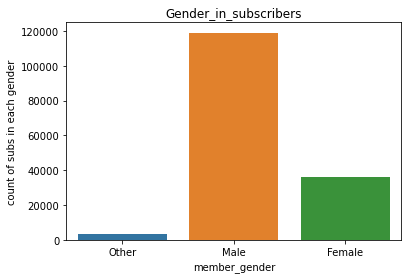

In [93]:
plt.title('Gender_in_subscribers')
sb.countplot(data= df_sub , x='member_gender')
plt.ylabel('count of subs in each gender');

## The dominate gender is Males again 

In [94]:
df_sub.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'age'],
      dtype='object')

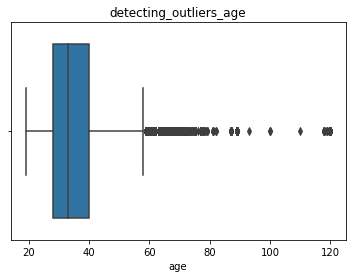

In [95]:
plt.title('detecting_outliers_age')
sb.boxplot(data=df_sub ,x='age');

In [96]:
df_sub = df_sub[df_sub['age']<54]

## Our age variable range between 19 & 53 . most of users range between 17 to 37

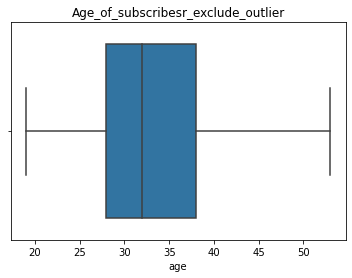

In [97]:
plt.title('Age_of_subscribesr_exclude_outlier')
sb.boxplot(data=df_sub ,x='age');

In [98]:
# ticks = np.arange(df_sub['age'].min(),df_sub['age'].max()+5,5)
# ticks_name = [str(x)  for x in range(df_sub['age'].min(),df_sub['age'].max()+5,5)]

## Age of most Subscribers are between  25 and 36 

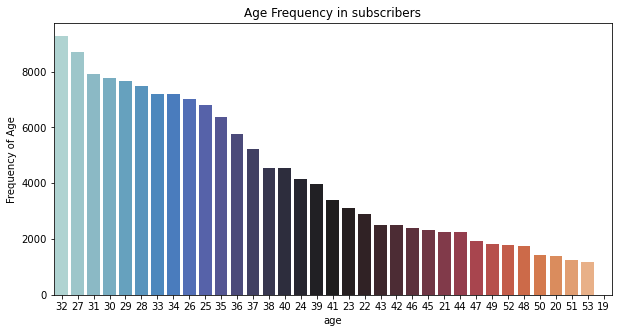

In [99]:

orders  = df_sub['age'].value_counts().index
plt.figure(figsize=(10,5))
sb.countplot(data=df_sub ,x='age' ,color = sb.color_palette()[0] ,order=orders ,palette='icefire' );
plt.title('Age Frequency in subscribers')
plt.ylabel('Frequency of Age');

In [100]:
### convert from seconds to minutes
df_sub['duration'] = ((df_sub['duration_sec'])/60).astype(int)

In [101]:
###remove any data that only appears 5 times or less 
# df_sub = df_sub[df_sub.groupby('duration').duration.transform(len) > 4]
# 

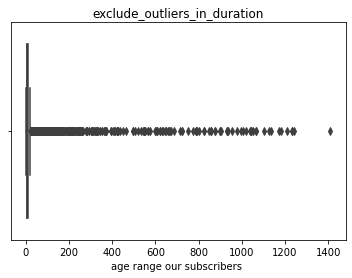

In [102]:
plt.title('exclude_outliers_in_duration')
sb.boxplot(data = df_sub , x = 'duration')
plt.xlabel('age range our subscribers ');


In [103]:
###remove any data more than 20 minute 

df_sub = df_sub [df_sub['duration']<=20]


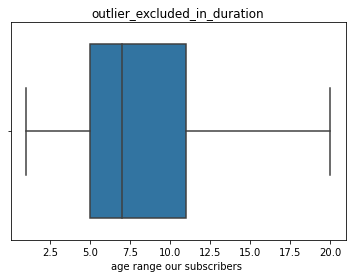

In [104]:
plt.title('outlier_excluded_in_duration')
sb.boxplot(data = df_sub , x = 'duration')
plt.xlabel('age range our subscribers ');


In [105]:
ticks = np.arange(df_sub['duration'].min(),df_sub['duration'].max()+5,5)
ticks_name = [str(x)  for x in range(df_sub['duration'].min(),df_sub['duration'].max()+5,5)]
orders = df_sub['duration'].value_counts().index

# Frequency of service usage durations

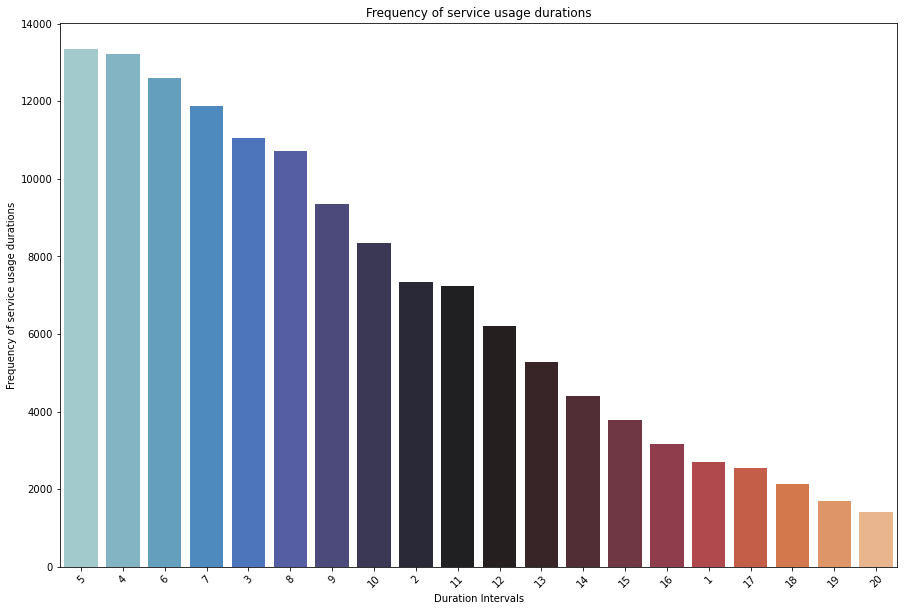

In [106]:
plt.figure(figsize=(15,10))
sb.countplot(data = df_sub , x ='duration' , order=orders ,palette='icefire') 
plt.xticks(rotation = 45)
plt.xlabel('Duration Intervals')
plt.ylabel('Frequency of service usage durations')
plt.title('Frequency of service usage durations');


## Second conclution part for subscribers
>* First time i plotted age i found alot of unresonable data as some user
>age was 124 year old so no chance for this to be true so i used boxplot 
> to know outliers so i  dropped any data with older than 55 using boxplot i 
> found any thing above this value is outlier 
>* I dropped any duration more than 20 minute as it is outlier
>* Most subscribers use service between 5~12 minutes
>* Most subscribers are male 
>* Most of subscribers have age between 25~ 36

### Investigating customer age & subscriber age distribution 

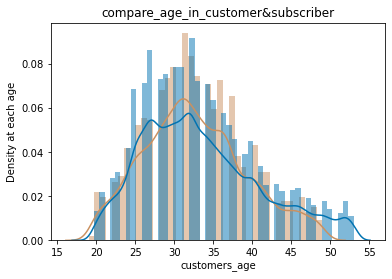

In [107]:
plt.title('compare_age_in_customer&subscriber')
sb.distplot(df_customer['age'],hist_kws={'alpha':.5},color=sb.color_palette('colorblind')[5] );
sb.distplot(df_sub['age'],hist_kws={'alpha':.5},color=sb.color_palette('colorblind')[0] );
plt.xlabel('customers_age')
plt.ylabel('Density at each age');

### And we got normal distribution for both  

### invistigate distribution for customer & subscriber  usage duration

Text(0.5, 1.0, 'compare_service_usage_time_in_customer&subscriber')

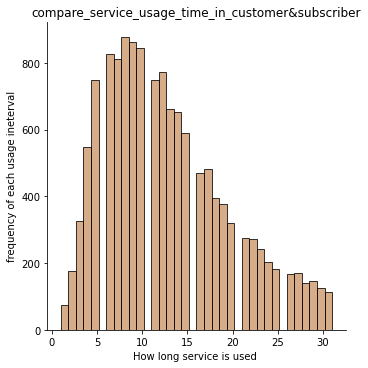

In [108]:
sb.displot(df_customer['duration'],color=sb.color_palette('colorblind')[5] )
plt.xlabel('How long service is used ')
plt.ylabel('frequency of each usage ineterval')
plt.title('compare_service_usage_time_in_customer&subscriber')


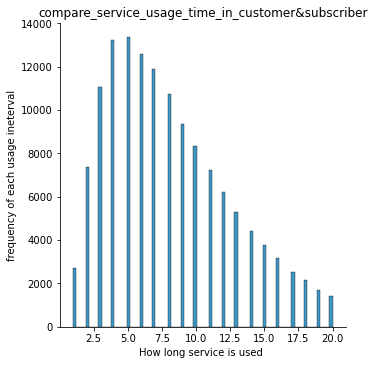

In [109]:
sb.displot(df_sub['duration'],color=sb.color_palette('colorblind')[0], );
plt.title('compare_service_usage_time_in_customer&subscriber')
plt.xlabel('How long service is used ')
plt.ylabel('frequency of each usage ineterval');

### Top 10  stations used as starting point for subscribers

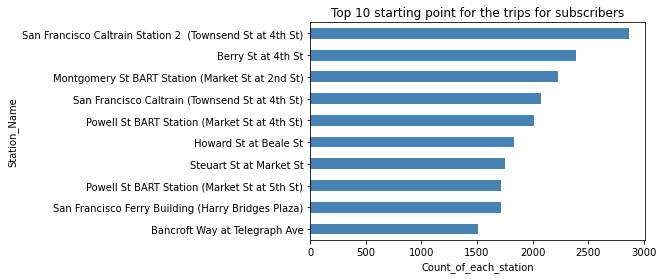

In [110]:
top_names = df_sub.start_station_name.value_counts()[1:11].sort_values()
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 starting point for the trips for subscribers')
plt.xlabel('Count_of_each_station')
plt.ylabel('Station_Name');

### Top 10  stations used ad starting point for customers

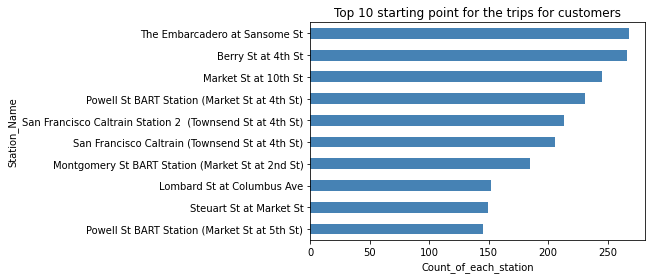

In [111]:
top_names = df_customer.start_station_name.value_counts()[1:11].sort_values()
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 starting point for the trips for customers')
plt.xlabel('Count_of_each_station')
plt.ylabel('Station_Name');


> for age variable we have normal distribution which mean adults is most users  ,for how much time servies is 
> used we have left skewed  whih mean they use mostly use service for short distance



> to detect and remove outliers
> * top10 station is differ from  subscribers to customers 
> which mean for some reason people in some areas prefer to use our service but not join with us

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### See relation between Age and duration of using service for customers

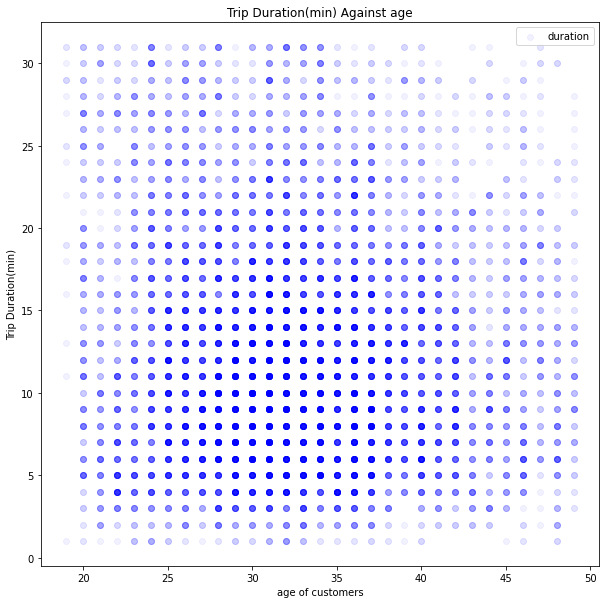

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(data =  df_customer, x= 'age',y = 'duration', alpha = 1/20 ,color='blue'  )
plt.legend()
plt.title('Trip Duration(min) Against age')
plt.xlabel('age of customers')
plt.ylabel('Trip Duration(min)');


## * There is a kind of relation between age service duration . as adult prefer to use service about 10 to 20 minutes

### See relation between Age and duration of using service for subscribers

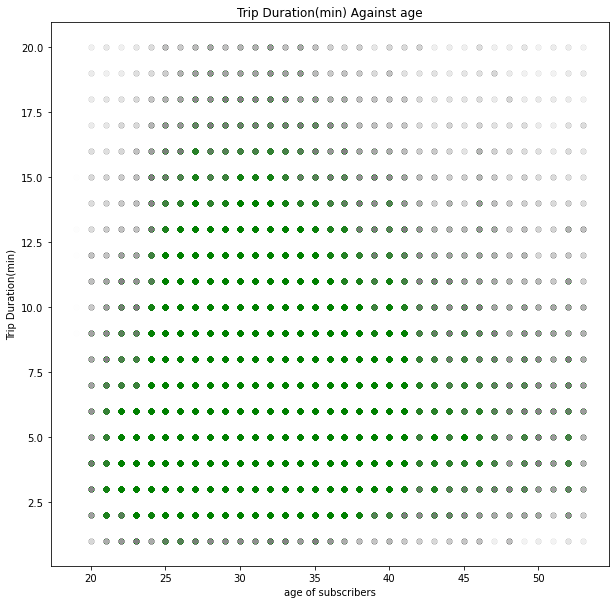

In [113]:
plt.figure(figsize=(10,10))
plt.scatter(data = df_sub,x= 'age',y='duration', alpha = 1/200,color='Green' )
plt.title('Trip Duration(min) Against age')
plt.xlabel('age of subscribers')
plt.ylabel('Trip Duration(min)');


### There is a kind of relation between age service duration . as adult prefer to use service on average of 15 minutes

### Trip Duration(min) Against gender for customers

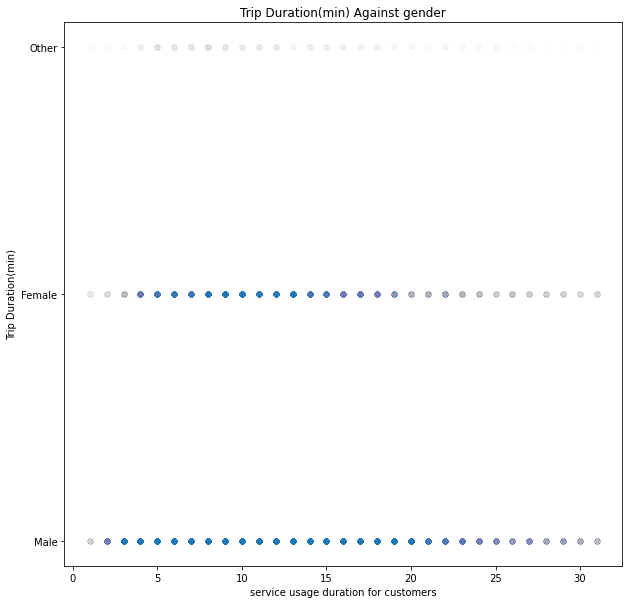

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(data = df_customer,x= 'duration',y='member_gender', alpha = 1/200 )
plt.title('Trip Duration(min) Against gender')
plt.xlabel('service usage duration for customers')
plt.ylabel('Trip Duration(min)');




### Male customers tend to use service for longer time 

### Trip Duration(min) Against gender for subscribers

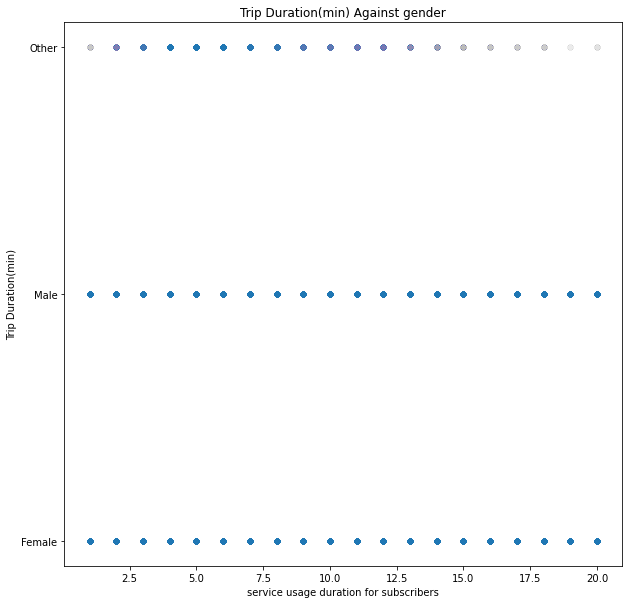

In [115]:
plt.figure(figsize=(10,10))
plt.scatter(data = df_sub,x= 'duration',y='member_gender', alpha = 1/200 )
plt.title('Trip Duration(min) Against gender')
plt.xlabel('service usage duration for subscribers')
plt.ylabel('Trip Duration(min)');


### Other gender tend to use service as subscribers more than customers

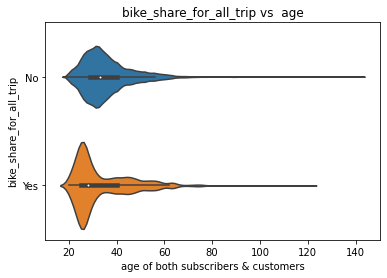

In [116]:
sb.violinplot(data = df , y ='bike_share_for_all_trip' , x = 'age')
plt.title('bike_share_for_all_trip vs  age')
plt.xlabel('age of both subscribers & customers')
plt.ylabel('bike_share_for_all_trip');



> * for subscribers between 30 ~ 35 they are more likely to use servies for 
> 13 min 
> * for customers between 30 ~ 35 they are more likey to use servies for about
> 9 min
> * Males use servies for longer period of time 
> * youth tends to bike_share_for_all _trips unlike adults 

> starnge thing other gender use service as subscribers more than customers


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Trip Duration(min) Against age and Gender

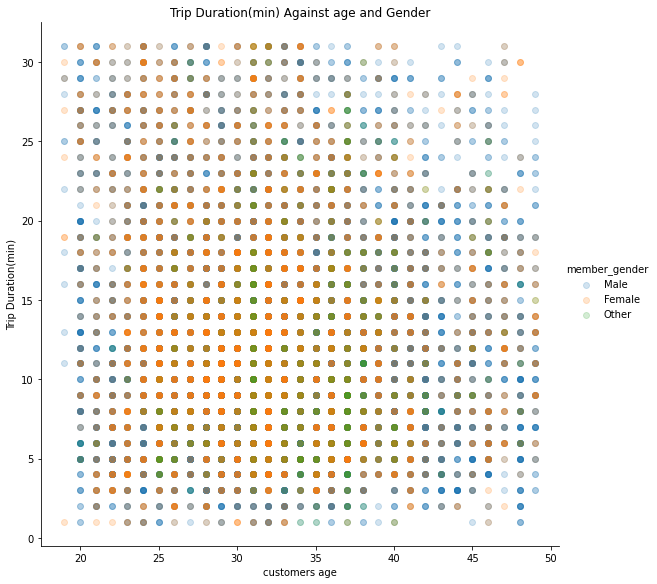

In [117]:
g = sb.FacetGrid(data =  df_customer, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'age','duration', alpha = 1/5)
g.add_legend()
plt.title('Trip Duration(min) Against age and Gender')
plt.xlabel('customers age')
plt.ylabel('Trip Duration(min)');

### relation between this 3 features is not clear

In [118]:
top10 = df['start_station_name'].value_counts()[:11].index.tolist()
top10

['Market St at 10th St',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Berry St at 4th St',
 'Montgomery St BART Station (Market St at 2nd St)',
 'Powell St BART Station (Market St at 4th St)',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'Howard St at Beale St',
 'Steuart St at Market St',
 'Powell St BART Station (Market St at 5th St)',
 'The Embarcadero at Sansome St']

# We will investigate top stations in our dataset

In [119]:
new_data = df[df['start_station_name'].isin(top10)]

In [120]:
new_data['duration_sec'] = new_data['duration_sec']/3600
new_data = new_data[new_data['age']<50]


<Figure size 1440x720 with 0 Axes>

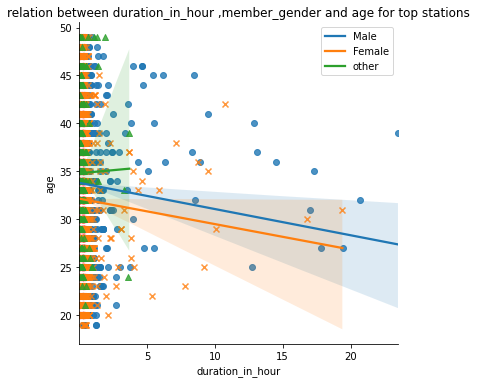

In [121]:
plt.figure(figsize=(20,10));
categories = ['o','x','^'];
sb.lmplot( x="duration_sec", y="age", data=new_data, hue='member_gender', legend=False ,markers=categories);
plt.legend(['Male','Female','other']);
plt.xlabel('duration_in_hour');
plt.title('relation between duration_in_hour ,member_gender and age for top stations');


### Males older than females use service for longer duration for this 10 stations

<Figure size 2160x2160 with 0 Axes>

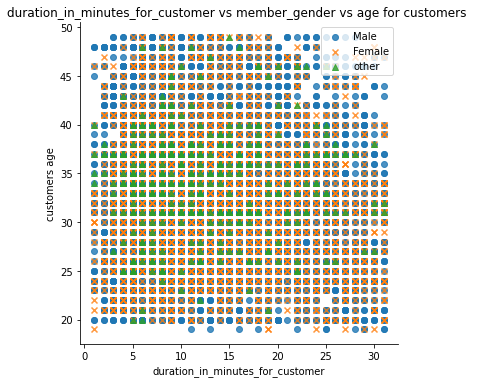

In [122]:
plt.figure(figsize=(30,30))
sb.lmplot( x="duration", y="age", data=df_customer, hue='member_gender', legend=False ,markers=categories ,fit_reg=False)
plt.legend(['Male','Female','other'])
plt.xlabel('duration_in_minutes_for_customer')
plt.ylabel('customers age')
plt.legend(['Male','Female','other'])
plt.title('duration_in_minutes_for_customer vs member_gender vs age for customers ');

> * male users have generally longer journey durations
> * WE invistigated top10 start_station . Males ride for long time , Female riders are younger than Male riders


> * older males use servies for long period of time compare to females in 
> same age 
> *  almost after 40 number of females dramatically decrease 
